# Explaination Of Transfer Learning Idea

**Types of transfer learning**

* Domain adaptation
```
In this setting, the domains of source and target tasks are usually the same. However,
the differences are related to the distribution of training and testing data. This
case of transfer learning is related to a fundamental assumption in any machine
learning task – the assumption that training and testing data are i.i.d. The first i
stands for independent, which implies that each sample is independent of the others.
In practice, this assumption can be violated when there are feedback loops, like in
recommendation systems. The second section is i.d., which stands for identically
distributed and implies that the distribution of labels and other characteristics
between training and test samples is the same.
```


***
* Multi-task learning
```
In multi-task learning, data from different but related tasks are passed through a
set of common layers. Then, there may be task-specific layers on the top that learn
about a particular task objective
The output of these task-specific layers would be evaluated on different loss
functions. All the training examples for all the tasks are passed through all the
layers of the model. The task-specific layers are not expected to do well for all the
tasks. The expectation is that the common layers learn some of the underlying
structure that is shared by the different tasks. This information about structure
provides useful signals and improves the performance of all the models. The data
for each task has many features. However, these features may be used to construct
representations that can be useful in other related tasks
```
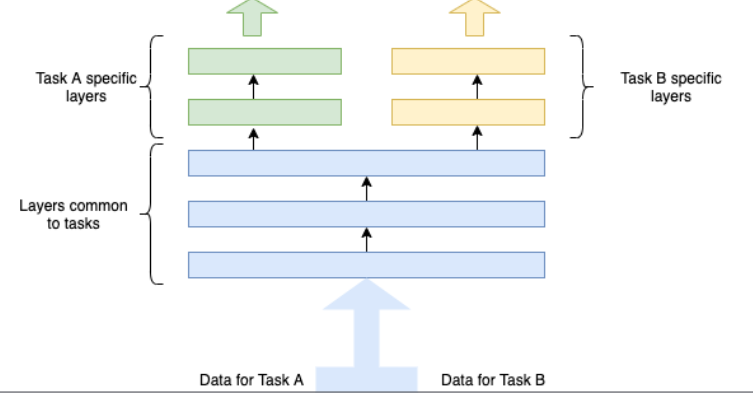

***
* Sequential learning
```
Sequential learning is the most common form of transfer learning. It is named so
because it involves two simple steps executed in sequence. The first step is pretraining and the second step is fine-tuning
The first step is to pre-train a model. The most successful pre-trained models use
some form of multi-task learning objectives, as depicted on the left side of the figure.
A portion of the model used for pre-training is then used for different tasks shown
on the right in the figure. This reusable part of the pre-trained model depends on the
specific architecture and may have a different set of layers. The reusable partition
 In the second step, the pre-trained model is
loaded and added as the starting layer of a task-specific model. The weights learned
by the pre-trained model can be frozen during the training of the task-specific model,
or those weights can be updated or fine-tuned. When the weights are frozen, then
this pattern of using the pre-trained model is called feature extraction.
Generally, fine-tuning gives better performance than a feature extraction approach.
However, there are some pros and cons to both approaches. In fine-tuning, not all
weights get updated as the task-specific training data may be much smaller in size.
If the pre-trained model is an embedding for words, then other embeddings can
become stale. If the task is such that it has a small vocabulary or has
many out-of vocabulary words, then this can hurt the performance of the model. Generally, if the
source and target tasks are similar, then fine-tuning would produce better results.
```

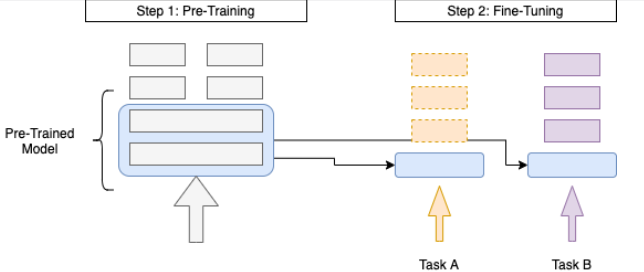

# Installing LIBs

In [ ]:
!pip install transformers
!wget http://nlp.stanford.edu/data/glove.6B.zip


     |████████████████████████████████| 2.5 MB 9.8 MB/s 
     |████████████████████████████████| 3.3 MB 52.0 MB/s 
     |████████████████████████████████| 895 kB 42.9 MB/s 
--2021-07-20 11:44:11--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-07-20 11:44:11--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-07-20 11:44:11--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads

In [ ]:
!unzip glove.6B.zip


Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


# Importing LIBs

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from transformers import BertTokenizer
from sklearn.model_selection import train_test_split
from transformers import TFBertForSequenceClassification
from transformers import TFBertModel


# Loading IMDB Data


In [ ]:
imdb_train, ds_info = tfds.load(name="imdb_reviews", split="train", 
                                with_info=True, as_supervised=True)

imdb_test = tfds.load(name="imdb_reviews", split="test", 
                      as_supervised=True)


INFO:absl:No config specified, defaulting to first: imdb_reviews/plain_text
INFO:absl:Load pre-computed DatasetInfo (eg: splits, num examples,...) from GCS: imdb_reviews/plain_text/1.0.0
INFO:absl:Load dataset info from /tmp/tmpu4g57gj2tfds
INFO:absl:Field info.config_name from disk and from code do not match. Keeping the one from code.
INFO:absl:Field info.config_description from disk and from code do not match. Keeping the one from code.
INFO:absl:Field info.citation from disk and from code do not match. Keeping the one from code.
INFO:absl:Generating dataset imdb_reviews (/root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0)


INFO:absl:Downloading http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz into /root/tensorflow_datasets/downloads/ai.stanfor.edu_amaas_sentime_aclImdb_v1PaujRp-TxjBWz59jHXsMDm5WiexbxzaFQkEnXc3Tvo8.tar.gz.tmp.e7fb7db7b9884fb888d6a86167b79093...
INFO:absl:Generating split train


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteVGM4P5/imdb_reviews-train.tfrecord


INFO:absl:Done writing /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteVGM4P5/imdb_reviews-train.tfrecord. Shard lengths: [25000]
INFO:absl:Generating split test


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteVGM4P5/imdb_reviews-test.tfrecord


INFO:absl:Done writing /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteVGM4P5/imdb_reviews-test.tfrecord. Shard lengths: [25000]
INFO:absl:Generating split unsupervised


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteVGM4P5/imdb_reviews-unsupervised.tfrecord


INFO:absl:Done writing /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteVGM4P5/imdb_reviews-unsupervised.tfrecord. Shard lengths: [50000]
INFO:absl:Skipping computing stats for mode ComputeStatsMode.SKIP.
INFO:absl:Constructing tf.data.Dataset for split train, from /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


INFO:absl:No config specified, defaulting to first: imdb_reviews/plain_text
INFO:absl:Load dataset info from /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0
INFO:absl:Reusing dataset imdb_reviews (/root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0)
INFO:absl:Constructing tf.data.Dataset for split test, from /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0


In [ ]:
for example, label in imdb_train.take(1):
    print(example, '\n', label)

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string) 
 tf.Tensor(0, shape=(), dtype=int64)


# **GloVe**

## Vocab And Tokenizer

In [ ]:
# use a default Tokenizer
tokenizer = tfds.deprecated.text.Tokenizer()
# unique words in dataset
vocab = set()
MAX_TOKENS = 0
for sent, label in imdb_train:
  tokens = tokenizer.tokenize(sent.numpy())
  vocab.update(tokens)
  if len(tokens) > MAX_TOKENS:
    MAX_TOKENS = len(tokens)


In [ ]:
imdb_encoder =  tfds.deprecated.text.TokenTextEncoder(vocab,lowercase=True,tokenizer=tokenizer)
vocab_size = imdb_encoder.vocab_size

In [ ]:
vocab_size , MAX_TOKENS, len(vocab)

(93931, 2525, 93929)

In [ ]:
# Verify
print(imdb_encoder.encode("i'm peter"))
print(imdb_encoder.decode(imdb_encoder.encode("i'm peter")))

[87169, 91427, 79025]
i m peter


In [ ]:
# encoding and Padding
def encode_pad_transform(sample):
    encoded = imdb_encoder.encode(sample.numpy())
    pad = sequence.pad_sequences([encoded], padding='post', 
                                 maxlen=150)
    return np.array(pad[0], dtype=np.int64)  
    
# Tf eager function for mapping later
def encode_tf_fn(sample, label):
    encoded = tf.py_function(encode_pad_transform, 
                                       inp=[sample], 
                                       Tout=(tf.int64))
    encoded.set_shape([None])
    label.set_shape([])
    return encoded, label

In [ ]:
# TESTING
subset = imdb_train.take(10)
tst = subset.map(encode_tf_fn)
for review, label in tst.take(1):
    print(review, label)
    print(imdb_encoder.decode(review))

tf.Tensor(
[78701 70146 92318 90361 81122 90737 64724 75449 84149 54810 78779 67350
 58494 57799 75024 43025 51177 39444 74853 69149 55385 82413 78701 50249
 86478 84149 93603 12896 75330 78779 41337 78126 93603 69149 88253 74855
 64572 10388 78701 90737 38345 79674  6259 78701 90737 48336 92318 90531
 53689 17294 58239 86265 79959 69346 29477 35017 81099 37711 69179 79959
 30425 82553 81099 61953 93603 28293 68920 87085 83156 52019 52391 45608
 14150 54483 89455 79257 93779 44500 81130 57799 70146 77704 82413 44976
 29477 80973 22829 78779 44976 90737 82858 70146 84397 85212 54742 27740
 81858 87169 85107 66516 82858 67483 74853 92993 71444 78701 91736 81854
 38345 71444 58494 57799 38345 93446 76348 87169 74855 74952 40175 57181
 93391     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0], shape=(150,), dtype=int64) tf.Tensor(0, shape=(), dtype=int64)
this was an

In [ ]:
# now tokenize/encode/pad all training
# and testing data
encoded_train = imdb_train.map(encode_tf_fn,
                               num_parallel_calls=tf.data.experimental.AUTOTUNE)
encoded_test = imdb_test.map(encode_tf_fn,
                             num_parallel_calls=tf.data.experimental.AUTOTUNE)

## Read Glove File

In [ ]:
# every line conatin word and it's vector 
# first column is word , rest of line is vector

dict_w2v = {}
with open('glove.6B.50d.txt', "r") as file:
  for line in file:
    splitted = line.split()
    word = splitted[0]
    vector = np.array(splitted[1:], dtype=np.float32)
    if vector.shape[0] == 50:
      dict_w2v[word] = vector
    else:
      print("There was an issue with " + word) 


In [ ]:
@print("Dictionary Size: ", len(dict_w2v))


Dictionary Size:  400000


## Building an Embedding Matrix


In [ ]:
# dim of embedding matrix
embedding_dim = 50
# size of embedding will be size of vocab * embedding dim
embedding_matrix = np.zeros((imdb_encoder.vocab_size, embedding_dim))

In [ ]:
# initalize emb matrix and count unk words
unk_cnt = 0
unk_set = set()
for word in imdb_encoder.tokens:
    embedding_vector = dict_w2v.get(word)

    if embedding_vector is not None:
        tkn_id = imdb_encoder.encode(word)[0]
        embedding_matrix[tkn_id] = embedding_vector
    else:
        unk_cnt += 1
        unk_set.add(word)

# Print how many werent found
print("Total unknown words: ", unk_cnt)

Total unknown words:  14553


In [ ]:
vocab_size = imdb_encoder.vocab_size 

# Number of RNN units
rnn_units = 64

#batch size
BATCH_SIZE=100

## BiLSTM Model

In [ ]:
def build_model_bilstm(vocab_size, embedding_dim, 
                       rnn_units, batch_size, train_emb=False):
  model = tf.keras.Sequential([
    Embedding(vocab_size, embedding_dim, mask_zero=True,
              weights=[embedding_matrix], trainable=train_emb),
    #Dropout(0.25),  
    Bidirectional(tf.keras.layers.LSTM(rnn_units, return_sequences=True, 
                                      dropout=0.5)),
    Bidirectional(tf.keras.layers.LSTM(rnn_units, dropout=0.25)),
    Dense(1, activation='sigmoid')
  ])
  return model

In [ ]:
#Train a Feature Extraction Sequential Transfer Learning Model
model_fe = build_model_bilstm(
  vocab_size = vocab_size,
  embedding_dim=embedding_dim,
  rnn_units=rnn_units,
  batch_size=BATCH_SIZE)

model_fe.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 50)          4696550   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         58880     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 4,854,375
Trainable params: 157,825
Non-trainable params: 4,696,550
_________________________________________________________________


In [ ]:
model_fe.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy', 'Precision', 'Recall'])

In [ ]:
# prefetch is prepare data for next batch so it's not consume time
encoded_train_batched = encoded_train.batch(BATCH_SIZE).prefetch(100)


In [ ]:
model_fe.fit(encoded_train_batched, epochs=30)


Epoch 1/30
250/250 [==============================] - 37s 72ms/step - loss: 0.5987 - accuracy: 0.6716 - precision: 0.6744 - recall: 0.6634
Epoch 2/30
250/250 [==============================] - 24s 94ms/step - loss: 0.5144 - accuracy: 0.7481 - precision: 0.7511 - recall: 0.7422
Epoch 3/30
250/250 [==============================] - 22s 89ms/step - loss: 0.4952 - accuracy: 0.7596 - precision: 0.7629 - recall: 0.7534
Epoch 4/30
250/250 [==============================] - 24s 95ms/step - loss: 0.4629 - accuracy: 0.7802 - precision: 0.7786 - recall: 0.7830
Epoch 5/30
250/250 [==============================] - 23s 94ms/step - loss: 0.4463 - accuracy: 0.7907 - precision: 0.7915 - recall: 0.7892
Epoch 6/30
250/250 [==============================] - 23s 90ms/step - loss: 0.4280 - accuracy: 0.8022 - precision: 0.8003 - recall: 0.8054
Epoch 7/30
250/250 [==============================] - 23s 92ms/step - loss: 0.4443 - accuracy: 0.7915 - precision: 0.7939 - recall: 0.7874
Epoch 8/30
250/250 [=======

In [ ]:
model_fe.evaluate(encoded_test.batch(BATCH_SIZE))

250/250 [==============================] - 22s 73ms/step - loss: 0.3872 - accuracy: 0.8537 - precision: 0.8012 - recall: 0.9407


[0.38724198937416077,
 0.8536800146102905,
 0.8012401461601257,
 0.9407200217247009]

In [ ]:
# Train a Fine-Tuning Sequential Transfer Learning Model
model_ft = build_model_bilstm(
  vocab_size=vocab_size,
  embedding_dim=embedding_dim,
  rnn_units=rnn_units,
  batch_size=BATCH_SIZE,
  train_emb=True)

model_ft.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 50)          4696550   
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         58880     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 4,854,375
Trainable params: 4,854,375
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_ft.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy', 'Precision', 'Recall'])

In [ ]:
model_ft.fit(encoded_train_batched, epochs=50)


Epoch 1/50
250/250 [==============================] - 46s 130ms/step - loss: 0.5436 - accuracy: 0.7195 - precision: 0.7197 - recall: 0.7191
Epoch 2/50
250/250 [==============================] - 33s 133ms/step - loss: 0.3962 - accuracy: 0.8216 - precision: 0.8242 - recall: 0.8174
Epoch 3/50
250/250 [==============================] - 34s 135ms/step - loss: 0.3236 - accuracy: 0.8620 - precision: 0.8601 - recall: 0.8646
Epoch 4/50
250/250 [==============================] - 33s 132ms/step - loss: 0.2745 - accuracy: 0.8858 - precision: 0.8888 - recall: 0.8820
Epoch 5/50
250/250 [==============================] - 34s 134ms/step - loss: 0.2428 - accuracy: 0.9029 - precision: 0.9032 - recall: 0.9026
Epoch 6/50
250/250 [==============================] - 33s 130ms/step - loss: 0.2044 - accuracy: 0.9196 - precision: 0.9196 - recall: 0.9195
Epoch 7/50
250/250 [==============================] - 34s 135ms/step - loss: 0.1765 - accuracy: 0.9316 - precision: 0.9339 - recall: 0.9289
Epoch 8/50
250/250 [

In [ ]:
model_ft.evaluate(encoded_test.batch(BATCH_SIZE))


250/250 [==============================] - 22s 73ms/step - loss: 1.3702 - accuracy: 0.8359 - precision: 0.8698 - recall: 0.7900


[1.370226263999939, 0.8358799815177917, 0.8698141574859619, 0.7900000214576721]

It can also be seen that the network is overfitting a little bit. A Dropout layer can
be added between the Embedding layer and the first LSTM layer to help reduce this
overfitting. It should also be noted that this network is still much faster than training
embeddings from scratch. Most epochs took 34 seconds for training. Overall, this
model is smaller in size, takes much less time to train, and has much higher accuracy!
This is why transfer learning is so important in machine learning in general and NLP
more specifically.
So far, we have seen the use of context-free word embeddings. The major challenge
with this approach is that a word could have multiple meanings depending on the
context. The word bank could refer to a place for storing money and valuables and
also the side of a river. A more recent innovation in this area is BERT

In [ ]:
tf.keras.backend.clear_session()

# **BERT**

In [ ]:
# Defining BERT tokenizer
#bert_name = 'bert-base-uncased'

bert_name = 'bert-base-cased'
tokenizer = BertTokenizer.from_pretrained(bert_name, add_special_tokens=True, 
                                          do_lower_case=False, max_length=150, 
                                          pad_to_max_length=True)

In [ ]:
tst = "This was an absolutely terrible movie. Don't be lured in \
        by Christopher Walken or Michael Ironside."
tokenizer.encode_plus(tst, add_special_tokens=True, max_length=150, 
                      pad_to_max_length=True, 
                      return_attention_mask=True, 
                      return_token_type_ids=True,
                      truncation=True)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


{'input_ids': [101, 1188, 1108, 1126, 7284, 6434, 2523, 119, 1790, 112, 189, 1129, 19615, 1181, 1107, 1118, 4978, 10065, 1424, 1137, 1847, 5621, 5570, 119, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
tokens = tokenizer.encode(tst, add_special_tokens=True)
tokenizer.decode(tokens)

"[CLS] This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. [SEP]"

In [ ]:
" ".join([tokenizer.decode([tok]) for tok in tokens])


"[CLS] This was an absolutely terrible movie . Don ' t be lure ##d in by Christopher Walk ##en or Michael Iron ##side . [SEP]"

In [ ]:
tokenizer.encode_plus("Don't be lured", add_special_tokens=True, 
                      max_length=9,
                      pad_to_max_length=True, 
                      return_attention_mask=True, 
                      return_token_type_ids=True,
                      truncation=True)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


{'input_ids': [101, 1790, 112, 189, 1129, 19615, 1181, 102, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 0]}

In [ ]:
# if two segment we observe the type ids have 1s , also we use special token [SEP] "102" to seperate between two segment
tokenizer.encode_plus("Don't be"," lured", add_special_tokens=True, 
                      max_length=10,
                      pad_to_max_length=True, 
                      return_attention_mask=True, 
                      return_token_type_ids=True,
                      truncation=True
                     )

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


{'input_ids': [101, 1790, 112, 189, 1129, 102, 19615, 1181, 102, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 1, 1, 1, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 0]}

In [ ]:
def bert_encoder(review):
    txt = review.numpy().decode('utf-8')
    encoded = tokenizer.encode_plus(txt, add_special_tokens=True, 
                                    max_length=150, pad_to_max_length=True, 
                                    return_attention_mask=True, 
                                    return_token_type_ids=True,
                                    truncation=True)
    return encoded['input_ids'], encoded['token_type_ids'], \
           encoded['attention_mask']

In [ ]:
# define X , y
bert_train = [bert_encoder(r) for r,l in imdb_train]
bert_lbl = [l for r, l in imdb_train]

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
bert_train = np.array(bert_train)
bert_train.shape

(25000, 3, 150)

In [ ]:

bert_lbl = tf.keras.utils.to_categorical(bert_lbl, num_classes=2)
bert_lbl.shape

(25000, 2)

In [ ]:
# splitting Data
x_train, x_val, y_train, y_val = train_test_split(bert_train, bert_lbl, 
                                                    test_size=0.2, 
                                                    random_state=42)

print(x_train.shape, y_train.shape)

(20000, 3, 150) (20000, 2)


In [ ]:
# Seperate each key
tr_reviews, tr_segments, tr_masks = np.split(x_train, 3, axis=1)
val_reviews, val_segments, val_masks = np.split(x_val, 3, axis=1)

In [ ]:
tr_reviews.shape

(20000, 1, 150)

In [ ]:
tr_reviews = tr_reviews.squeeze()
tr_segments = tr_segments.squeeze()
tr_masks = tr_masks.squeeze()

val_reviews = val_reviews.squeeze()
val_segments = val_segments.squeeze()
val_masks = val_masks.squeeze()

In [ ]:
# Make a tf dataset object
def example_to_features(input_ids,attention_masks,token_type_ids,y):
  return {"input_ids": input_ids,
          "attention_mask": attention_masks,
          "token_type_ids": token_type_ids},y


train_ds = tf.data.Dataset.from_tensor_slices((tr_reviews, tr_masks, 
                                               tr_segments, y_train)).\
            map(example_to_features).shuffle(100).batch(16)

valid_ds = tf.data.Dataset.from_tensor_slices((val_reviews, val_masks, 
                                               val_segments, y_val)).\
            map(example_to_features).shuffle(100).batch(16)

In [ ]:
bert_model = TFBertForSequenceClassification.from_pretrained(bert_name)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

bert_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
bert_model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  108310272 
_________________________________________________________________
dropout_37 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  1538      
Total params: 108,311,810
Trainable params: 108,311,810
Non-trainable params: 0
_________________________________________________________________


In [ ]:

print("Fine-tuning BERT on IMDB")
bert_history = bert_model.fit(train_ds, epochs=2, validation_data=valid_ds)

Fine-tuning BERT on IMDB
Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


1250/1250 [==============================] - ETA: 0s - loss: 0.3470 - accuracy: 0.8460WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


1250/1250 [==============================] - 761s 561ms/step - loss: 0.3470 - accuracy: 0.8460 - val_loss: 0.2641 - val_accuracy: 0.8922
Epoch 2/2
1250/1250 [==============================] - 697s 558ms/step - loss: 0.1941 - accuracy: 0.9248 - val_loss: 0.3123 - val_accuracy: 0.8820


In [ ]:
# prep data for testing
bert_test = [bert_encoder(r) for r,l in imdb_test]
bert_tst_lbl = [l for r, l in imdb_test]

bert_test2 = np.array(bert_test)
bert_tst_lbl2 = tf.keras.utils.to_categorical(bert_tst_lbl, num_classes=2)

ts_reviews, ts_segments, ts_masks = np.split(bert_test2, 3, axis=1)
ts_reviews = ts_reviews.squeeze()
ts_segments = ts_segments.squeeze()
ts_masks = ts_masks.squeeze()

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2132: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
test_ds = tf.data.Dataset.from_tensor_slices((ts_reviews, ts_masks, 
                                               ts_segments, bert_tst_lbl2)).\
            map(example_to_features).shuffle(100).batch(16)

In [ ]:
bert_model.evaluate(test_ds)


1563/1563 [==============================] - 273s 175ms/step - loss: 0.3103 - accuracy: 0.8805


[0.3102717101573944, 0.8805199861526489]

In [ ]:
from transformers import TFBertModel

In [ ]:
bert_name = 'bert-base-cased'
bert = TFBertModel.from_pretrained(bert_name)

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
bert.summary()

Model: "tf_bert_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  108310272 
Total params: 108,310,272
Trainable params: 108,310,272
Non-trainable params: 0
_________________________________________________________________


In [ ]:
max_seq_len = 150
inp_ids = tf.keras.layers.Input((max_seq_len,), dtype=tf.int64, name="input_ids")
att_mask = tf.keras.layers.Input((max_seq_len,), dtype=tf.int64, name="attention_mask")
seg_ids = tf.keras.layers.Input((max_seq_len,), dtype=tf.int64, name="token_type_ids")

In [ ]:
train_ds.element_spec

({'attention_mask': TensorSpec(shape=(None, 150), dtype=tf.int64, name=None),
  'input_ids': TensorSpec(shape=(None, 150), dtype=tf.int64, name=None),
  'token_type_ids': TensorSpec(shape=(None, 150), dtype=tf.int64, name=None)},
 TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))

In [ ]:
# must keys have same name
inp_dict = {"input_ids": inp_ids,
          "attention_mask": att_mask,
          "token_type_ids": seg_ids}
outputs = bert(inp_dict)

In [ ]:
outputs

TFBaseModelOutputWithPooling([('last_hidden_state',
                               <KerasTensor: shape=(None, 150, 768) dtype=float32 (created by layer 'tf_bert_model')>),
                              ('pooler_output',
                               <KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'tf_bert_model')>)])

In [ ]:
x = tf.keras.layers.Dropout(0.2)(outputs[1])
x = tf.keras.layers.Dense(200, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(2, activation='softmax')(x)

In [ ]:
custom_model = tf.keras.models.Model(inputs=inp_dict, outputs=x)

In [ ]:
train_ds.take(1)

<TakeDataset shapes: ({input_ids: (None, 150), attention_mask: (None, 150), token_type_ids: (None, 150)}, (None, 2)), types: ({input_ids: tf.int64, attention_mask: tf.int64, token_type_ids: tf.int64}, tf.float32)>

In [ ]:
# first train the new layers added 
# Feature Extracting
bert.trainable = False  
optimizer = tf.keras.optimizers.Adam()  # standard learning rate
loss = tf.keras.losses.BinaryCrossentropy() #from_logits=True)
custom_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
print("Custom Model: training custom model on IMDB")
custom_history = custom_model.fit(train_ds, epochs=10, 
                                  validation_data=valid_ds)

Custom Model: training custom model on IMDB
Epoch 1/10


1250/1250 [==============================] - ETA: 0s - loss: 0.6808 - accuracy: 0.5688WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


1250/1250 [==============================] - 304s 234ms/step - loss: 0.6808 - accuracy: 0.5688 - val_loss: 0.6528 - val_accuracy: 0.6276
Epoch 2/10
1250/1250 [==============================] - 290s 232ms/step - loss: 0.6571 - accuracy: 0.6075 - val_loss: 0.6369 - val_accuracy: 0.6384
Epoch 3/10
1250/1250 [==============================] - 290s 232ms/step - loss: 0.6453 - accuracy: 0.6284 - val_loss: 0.6133 - val_accuracy: 0.6710
Epoch 4/10
1250/1250 [==============================] - 290s 232ms/step - loss: 0.6405 - accuracy: 0.6362 - val_loss: 0.6160 - val_accuracy: 0.6680
Epoch 5/10
1250/1250 [==============================] - 290s 232ms/step - loss: 0.6341 - accuracy: 0.6392 - val_loss: 0.5997 - val_accuracy: 0.6854
Epoch 6/10
1250/1250 [==============================] - 290s 232ms/step - loss: 0.6345 - accuracy: 0.6402 - val_loss: 0.5978 - val_accuracy: 0.6836
Epoch 7/10
1250/1250 [==============================] - 290s 232ms/step - loss: 0.6332 - accuracy: 0.6416 - val_loss: 0.598

In [ ]:
custom_model.evaluate(test_ds)


1563/1563 [==============================] - 273s 174ms/step - loss: 0.5981 - accuracy: 0.6904


[0.5981252193450928, 0.6904000043869019]

In [ ]:
# Now finetune BERT for a couple of epochs
bert.trainable = True
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.BinaryCrossentropy() #from_logits=True)

custom_model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
custom_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
attention_mask (InputLayer)     [(None, 150)]        0                                            
__________________________________________________________________________________________________
input_ids (InputLayer)          [(None, 150)]        0                                            
__________________________________________________________________________________________________
token_type_ids (InputLayer)     [(None, 150)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 108310272   attention_mask[0][0]             
                                                                 input_ids[0][0]              

In [ ]:
print("Custom Model: Fine-tuning BERT on IMDB")
custom_history = custom_model.fit(train_ds, epochs=2, 
                                  validation_data=valid_ds)

Custom Model: Fine-tuning BERT on IMDB
Epoch 1/2


1250/1250 [==============================] - ETA: 0s - loss: 0.3604 - accuracy: 0.8439WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


1250/1250 [==============================] - 714s 560ms/step - loss: 0.3604 - accuracy: 0.8439 - val_loss: 0.2788 - val_accuracy: 0.8702
Epoch 2/2
1250/1250 [==============================] - 697s 557ms/step - loss: 0.2180 - accuracy: 0.9134 - val_loss: 0.2737 - val_accuracy: 0.8896


In [ ]:
custom_model.evaluate(test_ds)

1563/1563 [==============================] - 272s 174ms/step - loss: 0.2899 - accuracy: 0.8806


[0.28991788625717163, 0.8805599808692932]